# Unsupervised Machine Learning with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html

# Objectives

* Learn what is unsupervised machine learning

* Group data with clustering

* Find underlying linear patterns with PCA

![scikit-learn cheat sheet](http://amueller.github.io/sklearn_tutorial/cheat_sheet.png)

## Clustering

A series of techniques for finding clusters within datasets.

Clusters are groups of points that are closer to each other than to the rest.

<img src="clustering.png" alt="Clustering" style="height: 600px; float: left;"/>


# Generate random data

We're going to generate random data normally distributed around three centers, with noise. Each cluster will have 200 points. We concatenate all three groups in a single dataframe. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

npoints = 200

np.random.seed(7)
centroids = np.random.randn(3, 2)
centroids

array([[ 1.6905257 , -0.46593737],
       [ 0.03282016,  0.40751628],
       [-0.78892303,  0.00206557]])

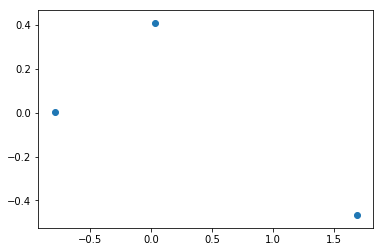

In [2]:
plt.scatter(centroids[:,0], centroids[:,1])

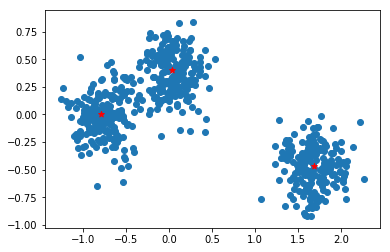

In [3]:
scale = .2

first_cluster = centroids[0,:] + np.random.randn(200, 2) * scale
second_cluster = centroids[1,:] + np.random.randn(200, 2) * scale
third_cluster = centroids[2,:] + np.random.randn(200, 2) * scale

all_points = np.concatenate((first_cluster, second_cluster, third_cluster))
plt.scatter(all_points[:,0], all_points[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c = 'r', marker = '*')

Please, note that the data we have created does not have a class. It is just a set of points. However, we DO know that they come from different distribution and our objective is to find out them.

## K-means clustering

Very simple algorithm, quite fast:

- Throw K candidate cluster centers (_centroids_) randomly at the data.

- Assign points to the closest centroid.

- Update the centroid as the average of its observations.

- Repeat 2,3 until convergence.



```
clustering (data, K):
    Randomly initialize K cluster centroids (mu(1),..., mu(k))
    # or select K random points from data
    Repeat until convergence:
        # assign cluster
        for d in data:
            assign d to closest cluster centroid
        # recompute cluster centroid
        for k = 1 to K:
            mu(k) = mean of data points assigned to cluster k
            
```

#### Exercise

For 3 random starting points, calculate which is the closest for each of our points.

(600, 3)

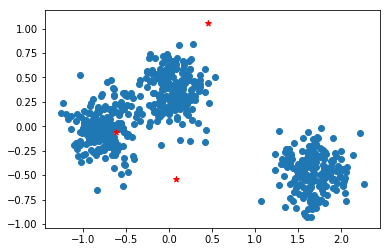

In [4]:
from scipy.spatial.distance import cdist

n_clusters = 3

initial_centroids = np.random.randn(n_clusters, 2)

plt.scatter(all_points[:,0], all_points[:,1])
plt.scatter(initial_centroids[:,0], initial_centroids[:,1], c = 'r', marker = '*')
cdist(all_points, initial_centroids).shape

In [5]:
cdist(all_points, initial_centroids)

array([[1.62947089, 2.24793576, 2.43209813],
       [1.82111062, 2.0140907 , 2.53088717],
       [1.48228885, 1.91627693, 2.23010379],
       ...,
       [1.20920035, 1.81175271, 0.38771444],
       [1.16549891, 1.74358607, 0.32896168],
       [1.01180143, 1.59118466, 0.15658575]])

In [6]:
clusters = np.argmin(cdist(all_points, initial_centroids), axis = 1)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1,

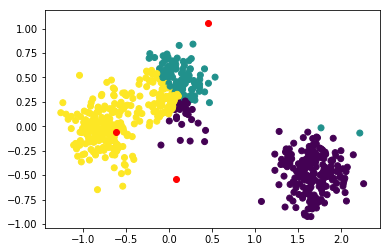

In [7]:
def plot(all_points, centroids, **kwargs):
    plt.scatter(all_points[:,0], all_points[:,1], **kwargs)
    plt.scatter(centroids[:,0], centroids[:,1], c = 'r')
plot(all_points, initial_centroids, c = clusters)

In [8]:
np.mean(all_points[clusters==0], axis = 0)

array([ 1.51589416, -0.42159956])

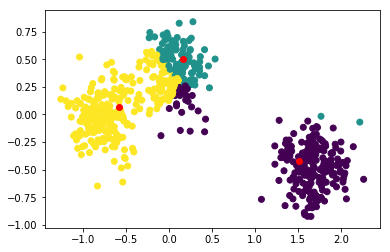

In [9]:
for cluster in range(n_clusters):
    centroids[cluster, :] = np.mean(all_points[clusters==cluster], axis = 0)

plot(all_points, centroids, c = clusters)

In [10]:
centroids

array([[ 1.51589416, -0.42159956],
       [ 0.15968957,  0.4992673 ],
       [-0.57759402,  0.0703913 ]])

In [11]:
cdist(all_points, centroids)

array([[0.4320676 , 2.01870347, 2.43532618],
       [0.38567762, 1.92930917, 2.50645303],
       [0.09295271, 1.72486605, 2.21770659],
       ...,
       [2.55384624, 1.27704079, 0.43851397],
       [2.49580979, 1.20722798, 0.37058092],
       [2.31476354, 1.03444195, 0.18616028]])

De nuevo se comprueban las distancias con los nuevos centroides:

In [12]:
clusters = np.argmin(cdist(all_points, centroids), axis = 1)

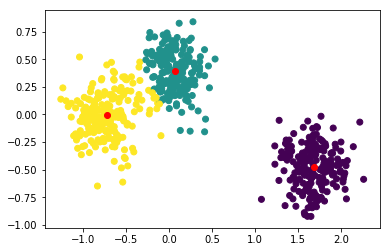

In [13]:
for cluster in range(n_clusters):
    centroids[cluster, :] = np.mean(all_points[clusters==cluster], axis = 0)

plot(all_points, centroids, c = clusters)

Una nueva iteración:

In [14]:
clusters = np.argmin(cdist(all_points, centroids), axis = 1)

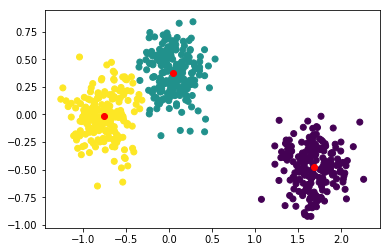

In [15]:
for cluster in range(n_clusters):
    centroids[cluster, :] = np.mean(all_points[clusters==cluster], axis = 0)

plot(all_points, centroids, c = clusters)

Now we are going to compare the original 'cluster' where each point comes from, with the asigned cluster. In order to do that, we just create a vector with the original class (color) and use that to plot. 

Please, recall that this is something we can do here because we're creating a synthetic dataset, but normally we won't be able to do it, since we don't know how the data has been generated.

Notice that class labels (kmeans) may not agree with original class number.

Now let's take some time to play with different number of (original) distributions and clusters and see the effect when number of clusters does not match true data

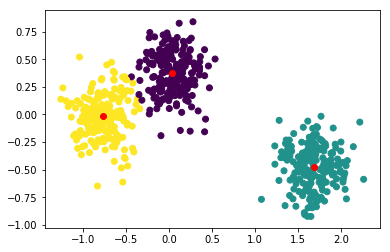

In [16]:
from sklearn.cluster import KMeans

three_clusters = KMeans(3) # 3 clusters

clusters = three_clusters.fit_predict(all_points)

plot(all_points, three_clusters.cluster_centers_, c = clusters)

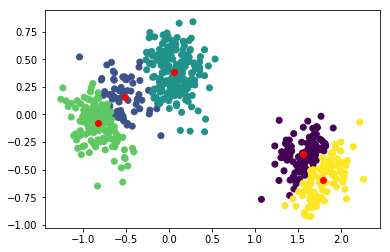

In [17]:
kmeans = KMeans(5) # 5 clusters

clusters = kmeans.fit_predict(all_points)

plot(all_points, kmeans.cluster_centers_, c = clusters)

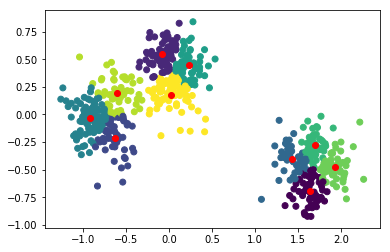

In [18]:
kmeans = KMeans(10) # 10 clusters

clusters = kmeans.fit_predict(all_points)

plot(all_points, kmeans.cluster_centers_, c = clusters)

### Practical: K-Means Clustering with sklearn

Download `players_20.csv` from [here](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv).

In [19]:
df = pd.read_csv('players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


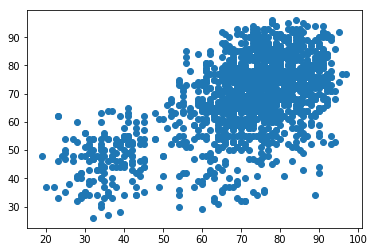

In [20]:
good = df[df['overall'] > 75]
plt.scatter(good['power_stamina'], good['movement_sprint_speed'])

In [83]:
good['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

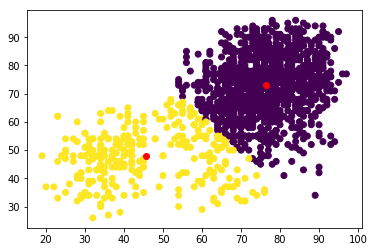

In [21]:
kmeans = KMeans(2)
clusters = kmeans.fit_predict(good[['power_stamina','movement_sprint_speed']])

plot(good[['power_stamina','movement_sprint_speed']].values, kmeans.cluster_centers_, c = clusters)

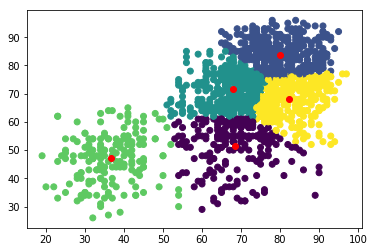

In [22]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(good[['power_stamina','movement_sprint_speed']])

plot(good[['power_stamina','movement_sprint_speed']].values, kmeans.cluster_centers_, c = clusters)

## The elbow method

To choose a number of clusters in KMeans

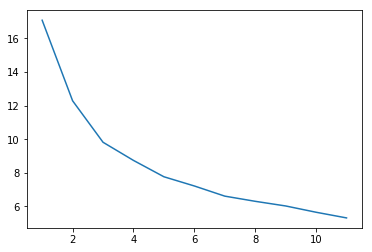

In [35]:
data = good[['power_stamina','movement_sprint_speed']]
max_clusters = 12

clusterings = []
scores = []

for n_clusters in range(1, max_clusters):
    
    kmeans = KMeans(n_clusters)
    clusters = kmeans.fit_predict(data)
    
    distances = cdist(data, kmeans.cluster_centers_)
    score = np.mean(np.min(distances, axis = 1))
    
    scores.append(score)
    clusterings.append(clusters)

plt.plot(range(1, max_clusters), scores)

## Hierarchical clustering

Instead of subdividing the observations, we join those that are similar to each other.

We can track the order in which we join them up and represent it as a _dendrogram_.

We don't need to specify the number of clusters beforehand.

<img src="https://i0.wp.com/datascienceplus.com/wp-content/uploads/2016/01/hclust.png" alt="Dendrogram" style="height: 600px; float: left;"/>


In [24]:
import sklearn
sklearn.__version__

# Actualizar sklearn

'0.20.1'

In [25]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_treshold=0, n_clusters = None)

result = clustering.fit_predict(data)

result

TypeError: __init__() got an unexpected keyword argument 'distance_treshold'

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(clustering)

### Distance measures in clustering

In any of these approaches, we need a measure of distance or similarity between points. 

In hierarchical clustering, we additionally need a measure of similarity between single points and groups of points.

How will this measures be influenced by the scale of our variables?

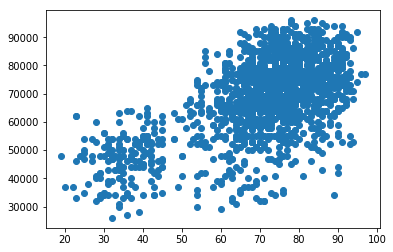

In [26]:
kmeans = KMeans(16)

X_1 = good['power_stamina']
X_2 = good['movement_sprint_speed'] * 1000

plt.scatter(X_1, X_2)

In [27]:
other_units = pd.concat([X_1, X_2], axis = 1)

clusters = kmeans.fit_predict(other_units)

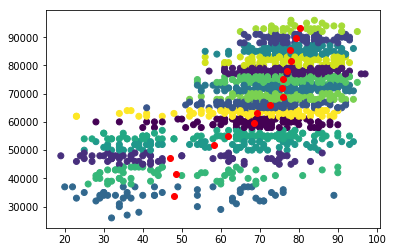

In [28]:
# Si no normalizas las variables

plot(other_units.values, kmeans.cluster_centers_, c = clusters)

### Clustering in scikit-learn

![Clustering algorithms in scikit-learn](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

## DBSCAN

There's also a hierarchical version.



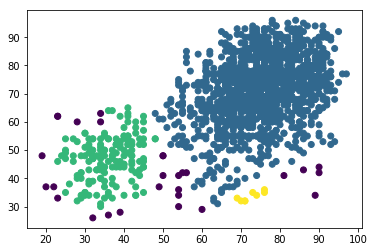

In [32]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps = 4) # Probar con .2, .5, 5...

clusters = dbscan.fit_predict(data)

plt.scatter(data['power_stamina'], data['movement_sprint_speed'], c = clusters)

In [30]:
pd.Series(clusters).value_counts()

 0    1417
 1     162
-1      28
 2       8
dtype: int64

## Measuring quality of clustering

### Elbow method

We've already seen it

### Silhouette

Asigna una puntuación a cada observación.  
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py


<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png" alt="Clustering"/>

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples

<BarContainer object of 10 artists>

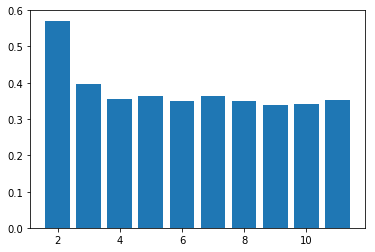

In [39]:
shilhouettes = []

for clustering in clusterings[1:]:
    shilhouettes.append(silhouette_score(data, clustering))
    
plt.bar(range(2, max_clusters), shilhouettes) # Mejor 2

## Dimensionality reduction

### Principal Component Analysis (PCA)

A dimensionality reduction technique

![PCA as base change](https://intoli.com/blog/pca-and-svd/img/basic-pca.png)

* Now let's apply PCA to our dataset.

In [45]:
pd.options.display.max_columns = None
good.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [43]:
good.select_dtypes('number').head()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8


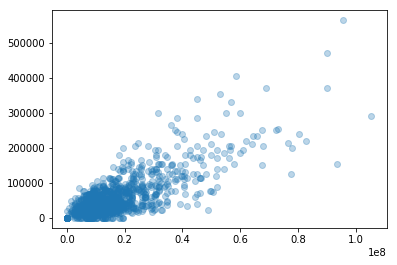

In [48]:
plt.scatter(good['value_eur'], good['wage_eur'], alpha = .3)

### Escalado de datos:

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
numeric = good.select_dtypes('number')
numeric = numeric.fillna(numeric.median())
normalized = scaler.fit_transform(numeric)


# Variables sintéticas
pca = PCA()

transforms = pca.fit_transform(normalized)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
transforms.shape

(1615, 61)

In [53]:
numeric.shape

(1615, 61)

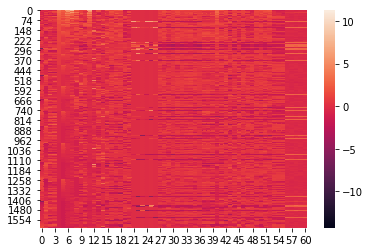

In [54]:
import seaborn as sns

sns.heatmap(normalized)

/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


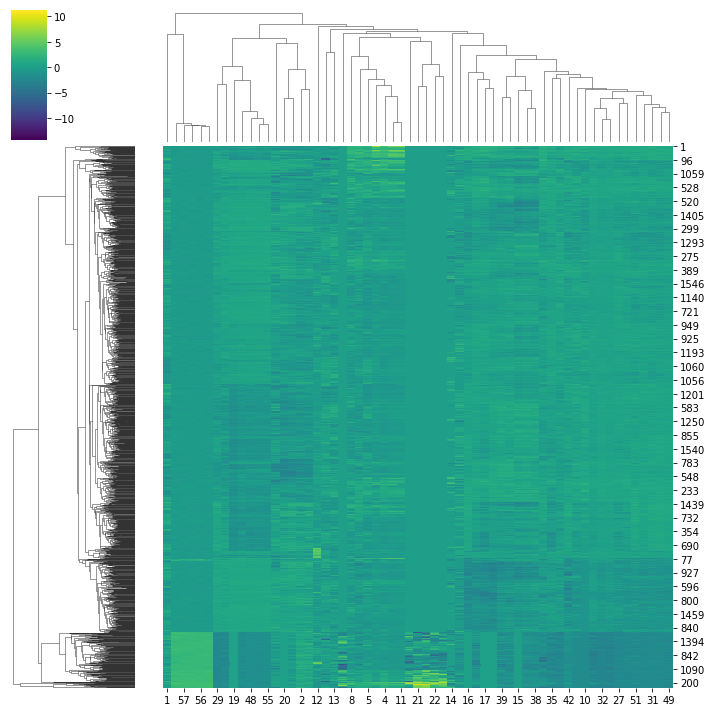

In [56]:
sns.clustermap(normalized, cmap = 'viridis')

/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


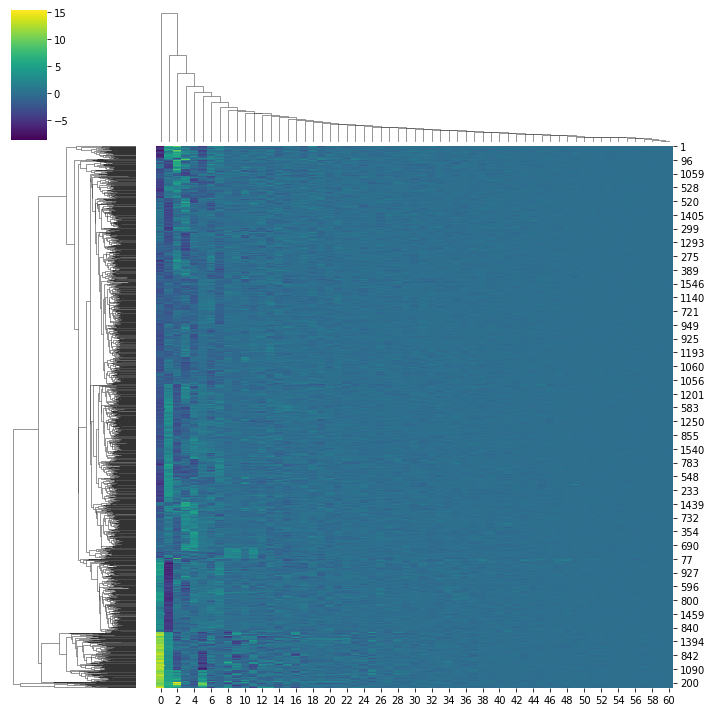

In [58]:
sns.clustermap(transforms, cmap = 'viridis')

In [59]:
pca.components_.shape

(61, 61)

In [60]:
pca.components_[:,0]

array([-1.80949440e-02, -1.32533592e-02, -2.46827928e-02, -3.47925407e-01,
        2.08774536e-01, -2.92879569e-02, -2.85476947e-01, -1.76189958e-02,
       -4.53103220e-02, -7.34264750e-02, -8.39510437e-02,  2.00598522e-02,
        1.11689841e-01,  9.50894140e-03, -2.67849317e-01, -1.97367537e-01,
       -4.12830226e-02, -8.35731840e-02, -1.32285507e-01, -1.93409775e-01,
       -2.59442746e-01, -3.25967498e-01,  1.39618548e-01, -4.74418077e-01,
       -1.14939290e-01, -7.13993178e-02, -1.23042472e-01, -1.70398093e-01,
       -1.04121873e-01, -4.39509893e-02, -1.19394597e-01, -2.42770940e-02,
       -1.70815287e-01,  3.10558312e-02, -2.64719991e-02,  9.23951186e-03,
        2.67882165e-02, -4.35148226e-02, -1.32097387e-02, -2.68583381e-02,
       -2.47766595e-02, -2.30140136e-03, -1.50598772e-02, -5.52162215e-03,
       -1.04835980e-02,  3.12508128e-02,  1.23957123e-02, -1.37155857e-02,
       -3.97129478e-02,  4.25923343e-02, -2.12060867e-02,  1.36458846e-02,
        1.20474446e-02, -

In [75]:
list(zip(numeric.columns, pca.components_[:,0])) # Relevancia de cada variable

[('sofifa_id', -0.018094943973799085),
 ('age', -0.0132533592295828),
 ('height_cm', -0.024682792796417),
 ('weight_kg', -0.34792540714426085),
 ('overall', 0.2087745363393645),
 ('potential', -0.029287956877219395),
 ('value_eur', -0.2854769473990443),
 ('wage_eur', -0.017618995821673193),
 ('international_reputation', -0.04531032196604299),
 ('weak_foot', -0.0734264749571038),
 ('skill_moves', -0.08395104369135323),
 ('release_clause_eur', 0.02005985224818146),
 ('team_jersey_number', 0.11168984052087984),
 ('contract_valid_until', 0.009508941404387324),
 ('nation_jersey_number', -0.2678493173993193),
 ('pace', -0.19736753666464263),
 ('shooting', -0.04128302264116565),
 ('passing', -0.08357318403099681),
 ('dribbling', -0.1322855070951158),
 ('defending', -0.1934097745707541),
 ('physic', -0.259442746406455),
 ('gk_diving', -0.3259674978920572),
 ('gk_handling', 0.13961854849680685),
 ('gk_kicking', -0.4744180767359849),
 ('gk_reflexes', -0.11493928972850767),
 ('gk_speed', -0.07139

In [62]:
# El producto escalar es 0 ya que son perpendiculares (ortogonales)

np.dot(pca.components_[:,0], pca.components_[:,1])

3.7601205778329912e-16

In [63]:
pca.explained_variance_

array([2.09702955e+01, 9.33528518e+00, 5.71205770e+00, 3.71870188e+00,
       2.92380228e+00, 2.47148176e+00, 1.78208882e+00, 1.31347959e+00,
       1.09358479e+00, 1.02872387e+00, 9.16380559e-01, 8.94574142e-01,
       7.92570804e-01, 7.11239926e-01, 6.40165138e-01, 5.56091869e-01,
       5.11143555e-01, 4.76618158e-01, 4.10546125e-01, 3.67649730e-01,
       3.20012005e-01, 3.10770522e-01, 2.85173582e-01, 2.73533739e-01,
       2.59231728e-01, 2.31050602e-01, 2.18578865e-01, 2.14028249e-01,
       2.01631696e-01, 1.83684265e-01, 1.73529112e-01, 1.65647910e-01,
       1.45061355e-01, 1.34787634e-01, 1.24633221e-01, 1.16677532e-01,
       1.03052746e-01, 9.90606281e-02, 9.44621079e-02, 9.02725275e-02,
       7.97524032e-02, 7.77134164e-02, 5.81147462e-02, 5.44497163e-02,
       5.36778400e-02, 5.03006963e-02, 4.34394686e-02, 4.19105966e-02,
       3.68694675e-02, 2.23350877e-02, 2.18790841e-02, 2.11585893e-02,
       2.03233340e-02, 1.95615520e-02, 1.83315140e-02, 1.75543181e-02,
      

<BarContainer object of 61 artists>

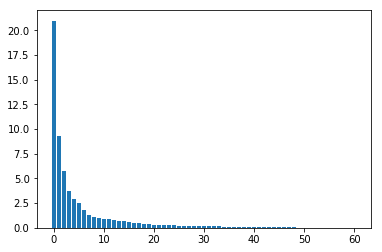

In [65]:
plt.bar(range(len(pca.explained_variance_)), pca.explained_variance_)

# Con la primera componente ya se explica el 20 % de la varianza

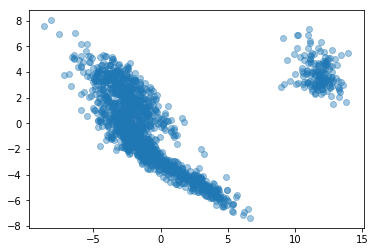

In [67]:
plt.scatter(transforms[:,0], transforms[:,1], alpha = .4)

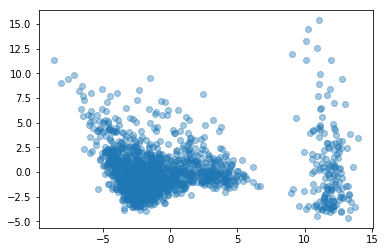

In [68]:
plt.scatter(transforms[:,0], transforms[:,2], alpha = .4)

In [70]:
clustering = DBSCAN(eps = 3)
clusters = clustering.fit_predict(transforms[:,:5])
pd.Series(clusters).value_counts()

 0    1442
 2     158
-1       9
 1       6
dtype: int64

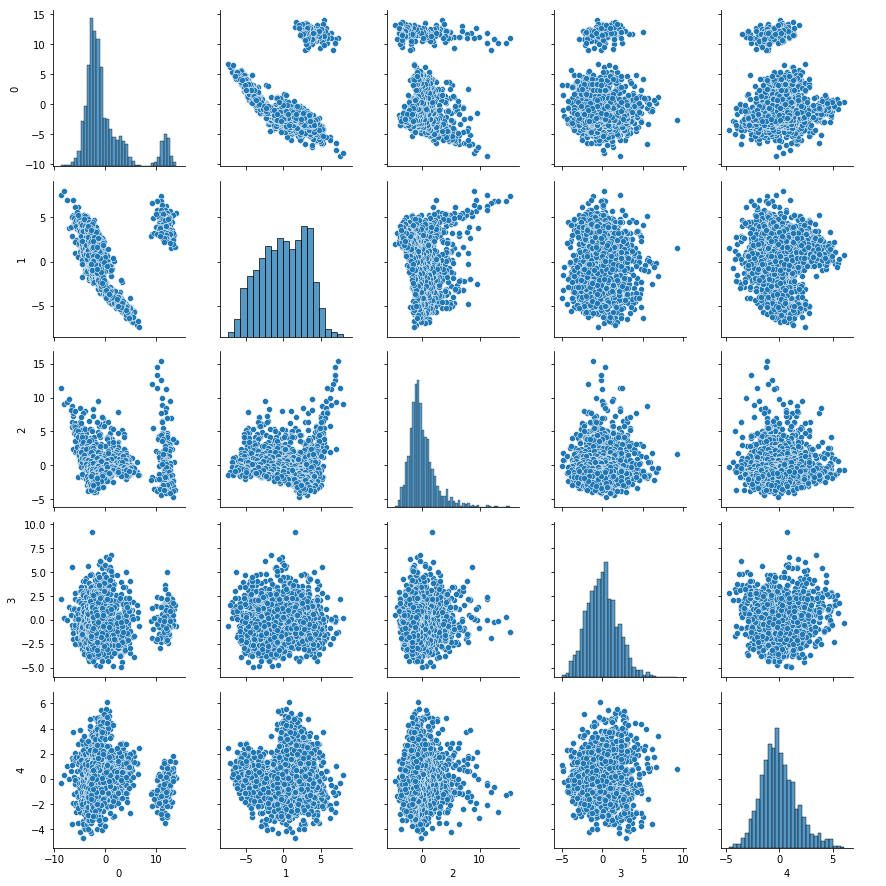

In [71]:
sns.pairplot(pd.DataFrame(transforms[:,:5]))

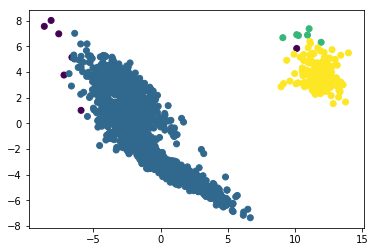

In [72]:
plt.scatter(transforms[:,0], transforms[:,1], c = clusters)

In [ ]:
# Los datos de test hay que escalarlos con el escalado "entrenado" con el train set

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[A comparison of classifiers available in scikit-learn](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[An amazing explanation of the kernel trick](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)

[Clustering in scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)

[Ensemble methods in scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html)

[An example of customer segmentation](https://www.kaggle.com/fabiendaniel/customer-segmentation)

[Hands-on ML](https://github.com/ageron/handson-ml2)

[Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)